In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("noise45.csv",low_memory=False)

In [3]:
data.describe()

,Mean,S.D1,Variance,Kurtotis1,Skew1,Entrophy1,Class
count,2.009000e+03,2.009000e+03,2.009000e+03,2009.000000,2009.000000,2009.000000,2009.000000
mean,5.301090e+04,7.013850e+06,7.111279e+14,213.806538,379.176862,36.366694,3.347934
std,3.254956e+05,4.464237e+07,7.927528e+15,98.944204,166.832505,20.732566,2.927391
min,5.713131e-02,8.951112e+00,4.006120e+01,41.103255,125.992591,0.069054,0.000000
25%,2.201003e+01,3.360204e+03,8.621839e+06,145.686862,233.440708,18.260208,1.000000
50%,5.869597e+02,7.657313e+04,3.210000e+09,192.607618,347.142722,31.213259,3.000000
75%,4.876562e+03,6.592431e+05,2.397620e+11,282.445804,500.304287,56.015115,6.000000
max,4.635434e+06,6.992452e+08,1.630000e+17,648.975640,847.222371,97.910728,9.000000


In [4]:
Y=data.pop("Class")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [29]:
X_2d = tsne.fit_transform(data)

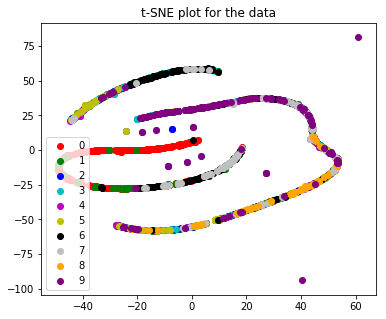

In [30]:
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[Y == i, 0], X_2d[Y == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE.fig', format='eps', dpi=1000)
plt.savefig('t-SNE.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [10]:
import datetime
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import nan

now = datetime.datetime.now

Using TensorFlow backend.


In [11]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [12]:
from numpy import argmax
from keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(data, Y, random_state = 42)
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [13]:
print(X_train.shape[0])
print(X_test.shape[0])
dims = X_train.shape[1]
print(dims, 'dims')
print("Building model...")

1506
503
6 dims
Building model...


In [14]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

#print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
#print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

X_test_scaled = (X_test - min_train)/range_train

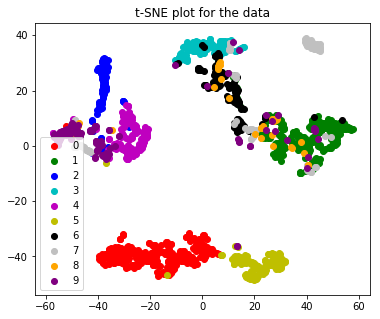

In [33]:
X_2d = tsne.fit_transform(X_train_scaled)
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_train == i, 0], X_2d[y_train == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

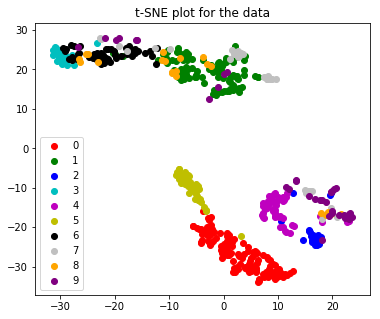

In [34]:
X_2d = tsne.fit_transform(X_test_scaled)
target_names=["0","1","2","3","4","5","6","7","8","9"]
target_ids = range(len(target_names))

from matplotlib import pyplot as plt
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'silver', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_2d[y_test == i, 0], X_2d[y_test == i, 1], c=c, label=label)
plt.legend( loc='lower left')
plt.savefig('t-SNE_for_scaled_testdata.fig', format='eps', dpi=1000)
plt.savefig('t-SNE_for_scaled_testdata.eps', format='eps', dpi=1000)
plt.title('t-SNE plot for the data')
plt.show()

In [17]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist1=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 2s 1ms/step - loss: 2.2240 - acc: 0.1906 - val_loss: 2.1323 - val_acc: 0.2366
Epoch 2/3000
1506/1506 [==============================] - 0s 88us/step - loss: 2.0820 - acc: 0.2178 - val_loss: 1.9835 - val_acc: 0.2604
Epoch 3/3000
1506/1506 [==============================] - 0s 88us/step - loss: 1.9349 - acc: 0.3028 - val_loss: 1.8225 - val_acc: 0.4692
Epoch 4/3000
1506/1506 [==============================] - 0s 88us/step - loss: 1.7542 - acc: 0.4210 - val_loss: 1.6341 - val_acc: 0.4672
Epoch 5/3000
1506/1506 [==============================] - 0s 72us/step - loss: 1.5807 - acc: 0.4210 - val_loss: 1.4934 - val_acc: 0.4672
Epoch 6/3000
1506/1506 [==============================] - 0s 50us/step - loss: 1.4509 - acc: 0.4329 - val_loss: 1.3932 - val_acc: 0.4791
Epoch 7/3000
1506/1506 [==============================] - 0s 53us/step - loss: 1.3544 - acc: 0.4509 - val_loss: 1.3178 - val_acc: 0.

1506/1506 [==============================] - 0s 56us/step - loss: 0.3693 - acc: 0.8924 - val_loss: 0.4527 - val_acc: 0.8648
Epoch 61/3000
1506/1506 [==============================] - 0s 53us/step - loss: 0.3676 - acc: 0.8984 - val_loss: 0.4496 - val_acc: 0.8569
Epoch 62/3000
1506/1506 [==============================] - 0s 55us/step - loss: 0.3721 - acc: 0.8931 - val_loss: 0.4507 - val_acc: 0.8588
Epoch 63/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.3696 - acc: 0.8958 - val_loss: 0.4475 - val_acc: 0.8648
Epoch 64/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.3669 - acc: 0.8958 - val_loss: 0.4454 - val_acc: 0.8688
Epoch 65/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.3616 - acc: 0.8977 - val_loss: 0.4448 - val_acc: 0.8588
Epoch 66/3000
1506/1506 [==============================] - 0s 56us/step - loss: 0.3622 - acc: 0.8931 - val_loss: 0.4445 - val_acc: 0.8628
Epoch 67/3000
1506/1506 [=======================

1506/1506 [==============================] - 0s 61us/step - loss: 0.3135 - acc: 0.9050 - val_loss: 0.3985 - val_acc: 0.8628
Epoch 120/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.3113 - acc: 0.9017 - val_loss: 0.3972 - val_acc: 0.8787
Epoch 121/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3109 - acc: 0.9011 - val_loss: 0.3880 - val_acc: 0.8767
Epoch 122/3000
1506/1506 [==============================] - 0s 50us/step - loss: 0.3077 - acc: 0.9037 - val_loss: 0.3924 - val_acc: 0.8787
Epoch 123/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.3134 - acc: 0.8997 - val_loss: 0.4002 - val_acc: 0.8827
Epoch 124/3000
1506/1506 [==============================] - 0s 49us/step - loss: 0.3098 - acc: 0.9064 - val_loss: 0.3978 - val_acc: 0.8827
Epoch 125/3000
1506/1506 [==============================] - 0s 52us/step - loss: 0.3083 - acc: 0.9031 - val_loss: 0.3904 - val_acc: 0.8827
Epoch 126/3000
1506/1506 [================

Epoch 178/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2876 - acc: 0.9077 - val_loss: 0.3711 - val_acc: 0.8867
Epoch 179/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.2849 - acc: 0.9117 - val_loss: 0.3564 - val_acc: 0.8807
Epoch 180/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2874 - acc: 0.9084 - val_loss: 0.3580 - val_acc: 0.8827
Epoch 181/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2828 - acc: 0.9117 - val_loss: 0.3669 - val_acc: 0.8827
Epoch 182/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2835 - acc: 0.9084 - val_loss: 0.3609 - val_acc: 0.8867
Epoch 183/3000
1506/1506 [==============================] - 0s 127us/step - loss: 0.2880 - acc: 0.9097 - val_loss: 0.3730 - val_acc: 0.8867
Epoch 184/3000
1506/1506 [==============================] - 0s 96us/step - loss: 0.2878 - acc: 0.9090 - val_loss: 0.3522 - val_acc: 0.8887
Epoch 185/3000
1506/1506 [

Epoch 237/3000
1506/1506 [==============================] - 0s 98us/step - loss: 0.2688 - acc: 0.9137 - val_loss: 0.3420 - val_acc: 0.8887
Epoch 238/3000
1506/1506 [==============================] - 0s 106us/step - loss: 0.2691 - acc: 0.9143 - val_loss: 0.3381 - val_acc: 0.8867
Epoch 239/3000
1506/1506 [==============================] - 0s 109us/step - loss: 0.2680 - acc: 0.9090 - val_loss: 0.3354 - val_acc: 0.8887
Epoch 240/3000
1506/1506 [==============================] - 0s 90us/step - loss: 0.2806 - acc: 0.9110 - val_loss: 0.3406 - val_acc: 0.8887
Epoch 241/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2669 - acc: 0.9137 - val_loss: 0.3494 - val_acc: 0.8867
Epoch 242/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2708 - acc: 0.9110 - val_loss: 0.3407 - val_acc: 0.8847
Epoch 243/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2663 - acc: 0.9104 - val_loss: 0.3335 - val_acc: 0.8907
Epoch 244/3000
1506/1506 

Epoch 296/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.2509 - acc: 0.9177 - val_loss: 0.3265 - val_acc: 0.8926
Epoch 297/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2539 - acc: 0.9143 - val_loss: 0.3198 - val_acc: 0.8926
Epoch 298/3000
1506/1506 [==============================] - 0s 57us/step - loss: 0.2519 - acc: 0.9183 - val_loss: 0.3248 - val_acc: 0.8946
Epoch 299/3000
1506/1506 [==============================] - 0s 60us/step - loss: 0.2844 - acc: 0.9097 - val_loss: 0.3246 - val_acc: 0.8847
Epoch 300/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2515 - acc: 0.9190 - val_loss: 0.3177 - val_acc: 0.8946
Epoch 301/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2553 - acc: 0.9163 - val_loss: 0.3326 - val_acc: 0.8926
Epoch 302/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2529 - acc: 0.9170 - val_loss: 0.3187 - val_acc: 0.8966
Epoch 303/3000
1506/1506 [=

Epoch 355/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2367 - acc: 0.9203 - val_loss: 0.3168 - val_acc: 0.8887
Epoch 356/3000
1506/1506 [==============================] - 0s 55us/step - loss: 0.2400 - acc: 0.9230 - val_loss: 0.3062 - val_acc: 0.8907
Epoch 357/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2412 - acc: 0.9203 - val_loss: 0.3036 - val_acc: 0.8887
Epoch 358/3000
1506/1506 [==============================] - 0s 57us/step - loss: 0.2433 - acc: 0.9157 - val_loss: 0.2962 - val_acc: 0.9085
Epoch 359/3000
1506/1506 [==============================] - 0s 59us/step - loss: 0.2354 - acc: 0.9216 - val_loss: 0.3009 - val_acc: 0.8946
Epoch 360/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2336 - acc: 0.9197 - val_loss: 0.3013 - val_acc: 0.9046
Epoch 361/3000
1506/1506 [==============================] - 0s 59us/step - loss: 0.2347 - acc: 0.9216 - val_loss: 0.3052 - val_acc: 0.8946
Epoch 362/3000
1506/1506 [=

1506/1506 [==============================] - 0s 64us/step - loss: 0.2254 - acc: 0.9243 - val_loss: 0.2916 - val_acc: 0.9225
Epoch 414/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2222 - acc: 0.9256 - val_loss: 0.2871 - val_acc: 0.9225
Epoch 415/3000
1506/1506 [==============================] - 0s 56us/step - loss: 0.2233 - acc: 0.9290 - val_loss: 0.3072 - val_acc: 0.8887
Epoch 416/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2280 - acc: 0.9230 - val_loss: 0.2803 - val_acc: 0.9145
Epoch 417/3000
1506/1506 [==============================] - 0s 56us/step - loss: 0.2190 - acc: 0.9250 - val_loss: 0.2862 - val_acc: 0.9046
Epoch 418/3000
1506/1506 [==============================] - 0s 56us/step - loss: 0.2255 - acc: 0.9236 - val_loss: 0.3083 - val_acc: 0.8887
Epoch 419/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2295 - acc: 0.9210 - val_loss: 0.2856 - val_acc: 0.9105
Epoch 420/3000
1506/1506 [================

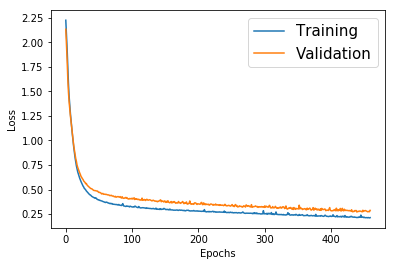

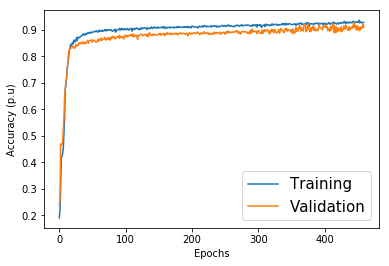

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.legend(['Training', 'Validation'], prop={'size': 15})
#plt.savefig('loss with adam.fig', format='eps', dpi=1000)
#plt.savefig('loss with adam.eps', format='eps', dpi=1000)

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Accuracy (p.u)')
plt.plot(hist1.history['acc'])
plt.plot(hist1.history['val_acc'])
#plt.savefig('accuracy with adam.fig', format='eps', dpi=1000)
#plt.savefig('accuracy with adam.eps', format='eps', dpi=1000)
plt.legend(['Training', 'Validation'], loc='lower right', prop={'size': 15})

In [19]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(29, input_shape=(dims,)))
m.add(Activation('softmax'))
m.add(Dense(20))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adam,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=1500, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/1500
1506/1506 [==============================] - 1s 439us/step - loss: 2.2871 - acc: 0.1746 - val_loss: 2.2633 - val_acc: 0.2048
Epoch 2/1500
1506/1506 [==============================] - 0s 74us/step - loss: 2.2535 - acc: 0.2151 - val_loss: 2.2207 - val_acc: 0.2366
Epoch 3/1500
1506/1506 [==============================] - 0s 77us/step - loss: 2.2194 - acc: 0.2151 - val_loss: 2.1816 - val_acc: 0.2366
Epoch 4/1500
1506/1506 [==============================] - 0s 74us/step - loss: 2.1933 - acc: 0.2151 - val_loss: 2.1547 - val_acc: 0.2366
Epoch 5/1500
1506/1506 [==============================] - 0s 90us/step - loss: 2.1751 - acc: 0.2151 - val_loss: 2.1335 - val_acc: 0.2366
Epoch 6/1500
1506/1506 [==============================] - 0s 72us/step - loss: 2.1623 - acc: 0.2151 - val_loss: 2.1209 - val_acc: 0.2366
Epoch 7/1500
1506/1506 [==============================] - 0s 61us/step - loss: 2.1459 - acc: 0.2151 - val_loss: 2.0987 - val_acc: 

1506/1506 [==============================] - 0s 58us/step - loss: 1.1985 - acc: 0.5691 - val_loss: 1.2239 - val_acc: 0.6183
Epoch 61/1500
1506/1506 [==============================] - 0s 61us/step - loss: 1.1902 - acc: 0.6282 - val_loss: 1.2156 - val_acc: 0.6103
Epoch 62/1500
1506/1506 [==============================] - 0s 61us/step - loss: 1.1820 - acc: 0.6102 - val_loss: 1.2050 - val_acc: 0.6064
Epoch 63/1500
1506/1506 [==============================] - 0s 62us/step - loss: 1.1740 - acc: 0.6082 - val_loss: 1.1977 - val_acc: 0.6203
Epoch 64/1500
1506/1506 [==============================] - 0s 59us/step - loss: 1.1655 - acc: 0.6169 - val_loss: 1.1891 - val_acc: 0.6143
Epoch 65/1500
1506/1506 [==============================] - 0s 60us/step - loss: 1.1576 - acc: 0.6248 - val_loss: 1.1826 - val_acc: 0.6223
Epoch 66/1500
1506/1506 [==============================] - 0s 50us/step - loss: 1.1500 - acc: 0.6242 - val_loss: 1.1755 - val_acc: 0.6203
Epoch 67/1500
1506/1506 [=======================

1506/1506 [==============================] - 0s 69us/step - loss: 0.7989 - acc: 0.7709 - val_loss: 0.8211 - val_acc: 0.7614
Epoch 120/1500
1506/1506 [==============================] - 0s 66us/step - loss: 0.7955 - acc: 0.7749 - val_loss: 0.8166 - val_acc: 0.7535
Epoch 121/1500
1506/1506 [==============================] - 0s 66us/step - loss: 0.7905 - acc: 0.7716 - val_loss: 0.8111 - val_acc: 0.7594
Epoch 122/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.7865 - acc: 0.7722 - val_loss: 0.8067 - val_acc: 0.7614
Epoch 123/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.7817 - acc: 0.7762 - val_loss: 0.8017 - val_acc: 0.7634
Epoch 124/1500
1506/1506 [==============================] - 0s 63us/step - loss: 0.7770 - acc: 0.7802 - val_loss: 0.7989 - val_acc: 0.7694
Epoch 125/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.7726 - acc: 0.7795 - val_loss: 0.7949 - val_acc: 0.7634
Epoch 126/1500
1506/1506 [================

1506/1506 [==============================] - 0s 49us/step - loss: 0.6040 - acc: 0.8426 - val_loss: 0.6343 - val_acc: 0.8191
Epoch 179/1500
1506/1506 [==============================] - 0s 52us/step - loss: 0.6012 - acc: 0.8446 - val_loss: 0.6312 - val_acc: 0.8310
Epoch 180/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.6002 - acc: 0.8413 - val_loss: 0.6294 - val_acc: 0.8250
Epoch 181/1500
1506/1506 [==============================] - 0s 48us/step - loss: 0.5998 - acc: 0.8466 - val_loss: 0.6270 - val_acc: 0.8211
Epoch 182/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.5960 - acc: 0.8420 - val_loss: 0.6279 - val_acc: 0.8250
Epoch 183/1500
1506/1506 [==============================] - 0s 44us/step - loss: 0.5971 - acc: 0.8446 - val_loss: 0.6223 - val_acc: 0.8290
Epoch 184/1500
1506/1506 [==============================] - 0s 50us/step - loss: 0.5908 - acc: 0.8446 - val_loss: 0.6221 - val_acc: 0.8290
Epoch 185/1500
1506/1506 [================

1506/1506 [==============================] - ETA: 0s - loss: 0.4968 - acc: 0.864 - 0s 64us/step - loss: 0.4877 - acc: 0.8612 - val_loss: 0.5287 - val_acc: 0.8410
Epoch 238/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.4852 - acc: 0.8606 - val_loss: 0.5269 - val_acc: 0.8449
Epoch 239/1500
1506/1506 [==============================] - 0s 69us/step - loss: 0.4837 - acc: 0.8606 - val_loss: 0.5242 - val_acc: 0.8429
Epoch 240/1500
1506/1506 [==============================] - 0s 66us/step - loss: 0.4808 - acc: 0.8586 - val_loss: 0.5232 - val_acc: 0.8410
Epoch 241/1500
1506/1506 [==============================] - 0s 77us/step - loss: 0.4770 - acc: 0.8606 - val_loss: 0.5200 - val_acc: 0.8429
Epoch 242/1500
1506/1506 [==============================] - 0s 88us/step - loss: 0.4758 - acc: 0.8625 - val_loss: 0.5179 - val_acc: 0.8429
Epoch 243/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.4726 - acc: 0.8619 - val_loss: 0.5161 - val_acc: 0.8390
Epoc

1506/1506 [==============================] - 0s 64us/step - loss: 0.4086 - acc: 0.8772 - val_loss: 0.4813 - val_acc: 0.8469
Epoch 296/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.4084 - acc: 0.8772 - val_loss: 0.4802 - val_acc: 0.8429
Epoch 297/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.4080 - acc: 0.8772 - val_loss: 0.4801 - val_acc: 0.8429
Epoch 298/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.4070 - acc: 0.8765 - val_loss: 0.4793 - val_acc: 0.8449
Epoch 299/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.4063 - acc: 0.8752 - val_loss: 0.4781 - val_acc: 0.8449
Epoch 300/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.4050 - acc: 0.8778 - val_loss: 0.4785 - val_acc: 0.8429
Epoch 301/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.4042 - acc: 0.8772 - val_loss: 0.4781 - val_acc: 0.8429
Epoch 302/1500
1506/1506 [================

1506/1506 [==============================] - 0s 61us/step - loss: 0.3786 - acc: 0.8851 - val_loss: 0.4598 - val_acc: 0.8449
Epoch 355/1500
1506/1506 [==============================] - 0s 56us/step - loss: 0.3776 - acc: 0.8878 - val_loss: 0.4579 - val_acc: 0.8449
Epoch 356/1500
1506/1506 [==============================] - 0s 56us/step - loss: 0.3769 - acc: 0.8871 - val_loss: 0.4588 - val_acc: 0.8449
Epoch 357/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3764 - acc: 0.8845 - val_loss: 0.4590 - val_acc: 0.8449
Epoch 358/1500
1506/1506 [==============================] - 0s 57us/step - loss: 0.3755 - acc: 0.8884 - val_loss: 0.4574 - val_acc: 0.8469
Epoch 359/1500
1506/1506 [==============================] - 0s 74us/step - loss: 0.3761 - acc: 0.8865 - val_loss: 0.4573 - val_acc: 0.8449
Epoch 360/1500
1506/1506 [==============================] - 0s 101us/step - loss: 0.3753 - acc: 0.8865 - val_loss: 0.4573 - val_acc: 0.8469
Epoch 361/1500
1506/1506 [===============

1506/1506 [==============================] - 0s 58us/step - loss: 0.3602 - acc: 0.8891 - val_loss: 0.4436 - val_acc: 0.8509
Epoch 413/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3600 - acc: 0.8891 - val_loss: 0.4413 - val_acc: 0.8529
Epoch 414/1500
1506/1506 [==============================] - 0s 56us/step - loss: 0.3588 - acc: 0.8898 - val_loss: 0.4401 - val_acc: 0.8529
Epoch 415/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.3619 - acc: 0.8911 - val_loss: 0.4430 - val_acc: 0.8489
Epoch 416/1500
1506/1506 [==============================] - 0s 93us/step - loss: 0.3584 - acc: 0.8911 - val_loss: 0.4409 - val_acc: 0.8509
Epoch 417/1500
1506/1506 [==============================] - 0s 96us/step - loss: 0.3587 - acc: 0.8898 - val_loss: 0.4407 - val_acc: 0.8489
Epoch 418/1500
1506/1506 [==============================] - 0s 90us/step - loss: 0.3576 - acc: 0.8904 - val_loss: 0.4406 - val_acc: 0.8489
Epoch 419/1500
1506/1506 [================

1506/1506 [==============================] - 0s 64us/step - loss: 0.3449 - acc: 0.8951 - val_loss: 0.4277 - val_acc: 0.8509
Epoch 472/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3454 - acc: 0.8918 - val_loss: 0.4263 - val_acc: 0.8509
Epoch 473/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3447 - acc: 0.8918 - val_loss: 0.4271 - val_acc: 0.8529
Epoch 474/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3448 - acc: 0.8944 - val_loss: 0.4237 - val_acc: 0.8489
Epoch 475/1500
1506/1506 [==============================] - 0s 56us/step - loss: 0.3445 - acc: 0.8911 - val_loss: 0.4266 - val_acc: 0.8509
Epoch 476/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3457 - acc: 0.8924 - val_loss: 0.4251 - val_acc: 0.8489
Epoch 477/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3474 - acc: 0.8911 - val_loss: 0.4266 - val_acc: 0.8588
Epoch 478/1500
1506/1506 [================

Epoch 530/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.3446 - acc: 0.8944 - val_loss: 0.4202 - val_acc: 0.8549
Epoch 531/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3350 - acc: 0.8918 - val_loss: 0.4165 - val_acc: 0.8549
Epoch 532/1500
1506/1506 [==============================] - 0s 63us/step - loss: 0.3339 - acc: 0.8938 - val_loss: 0.4150 - val_acc: 0.8529
Epoch 533/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3388 - acc: 0.8904 - val_loss: 0.4156 - val_acc: 0.8608
Epoch 534/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3332 - acc: 0.8951 - val_loss: 0.4158 - val_acc: 0.8569
Epoch 535/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3338 - acc: 0.8944 - val_loss: 0.4174 - val_acc: 0.8588
Epoch 536/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3346 - acc: 0.8951 - val_loss: 0.4169 - val_acc: 0.8569
Epoch 537/1500
1506/1506 [=

Epoch 589/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.3268 - acc: 0.8964 - val_loss: 0.4081 - val_acc: 0.8608
Epoch 590/1500
1506/1506 [==============================] - ETA: 0s - loss: 0.3516 - acc: 0.886 - 0s 61us/step - loss: 0.3261 - acc: 0.8977 - val_loss: 0.4087 - val_acc: 0.8628
Epoch 591/1500
1506/1506 [==============================] - 0s 59us/step - loss: 0.3268 - acc: 0.8964 - val_loss: 0.4098 - val_acc: 0.8588
Epoch 592/1500
1506/1506 [==============================] - 0s 59us/step - loss: 0.3278 - acc: 0.8971 - val_loss: 0.4098 - val_acc: 0.8628
Epoch 593/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.3269 - acc: 0.8971 - val_loss: 0.4106 - val_acc: 0.8628
Epoch 594/1500
1506/1506 [==============================] - 0s 76us/step - loss: 0.3263 - acc: 0.8958 - val_loss: 0.4088 - val_acc: 0.8608
Epoch 595/1500
1506/1506 [==============================] - 0s 90us/step - loss: 0.3258 - acc: 0.8977 - val_loss: 0.4076 - val_a

1506/1506 [==============================] - 0s 69us/step - loss: 0.3201 - acc: 0.8984 - val_loss: 0.4042 - val_acc: 0.8608
Epoch 648/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3200 - acc: 0.8984 - val_loss: 0.4029 - val_acc: 0.8628
Epoch 649/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3192 - acc: 0.8984 - val_loss: 0.4013 - val_acc: 0.8628
Epoch 650/1500
1506/1506 [==============================] - 0s 64us/step - loss: 0.3190 - acc: 0.8991 - val_loss: 0.4022 - val_acc: 0.8628
Epoch 651/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3216 - acc: 0.8984 - val_loss: 0.4036 - val_acc: 0.8648
Epoch 652/1500
1506/1506 [==============================] - 0s 61us/step - loss: 0.3190 - acc: 0.8991 - val_loss: 0.4009 - val_acc: 0.8628
Epoch 653/1500
1506/1506 [==============================] - 0s 58us/step - loss: 0.3204 - acc: 0.8971 - val_loss: 0.4025 - val_acc: 0.8628
Epoch 654/1500
1506/1506 [================

In [20]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist2=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 1s 382us/step - loss: 2.2328 - acc: 0.1965 - val_loss: 2.0942 - val_acc: 0.2366
Epoch 2/3000
1506/1506 [==============================] - 0s 73us/step - loss: 2.0881 - acc: 0.3347 - val_loss: 1.9732 - val_acc: 0.4414
Epoch 3/3000
1506/1506 [==============================] - 0s 64us/step - loss: 1.9413 - acc: 0.3958 - val_loss: 1.7977 - val_acc: 0.4414
Epoch 4/3000
1506/1506 [==============================] - 0s 65us/step - loss: 1.7553 - acc: 0.3958 - val_loss: 1.6457 - val_acc: 0.4414
Epoch 5/3000
1506/1506 [==============================] - 0s 66us/step - loss: 1.6142 - acc: 0.3964 - val_loss: 1.5659 - val_acc: 0.4433
Epoch 6/3000
1506/1506 [==============================] - 0s 66us/step - loss: 1.5161 - acc: 0.4031 - val_loss: 1.4767 - val_acc: 0.4533
Epoch 7/3000
1506/1506 [==============================] - 0s 64us/step - loss: 1.4269 - acc: 0.4442 - val_loss: 1.4017 - val_acc: 

1506/1506 [==============================] - 0s 64us/step - loss: 0.3761 - acc: 0.8871 - val_loss: 0.4345 - val_acc: 0.8529
Epoch 60/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.3710 - acc: 0.8845 - val_loss: 0.4488 - val_acc: 0.8608
Epoch 61/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3669 - acc: 0.8904 - val_loss: 0.6222 - val_acc: 0.8171
Epoch 62/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3989 - acc: 0.8811 - val_loss: 0.4697 - val_acc: 0.8549
Epoch 63/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3614 - acc: 0.8898 - val_loss: 0.4645 - val_acc: 0.8509
Epoch 64/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3668 - acc: 0.8891 - val_loss: 0.4562 - val_acc: 0.8569
Epoch 65/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3649 - acc: 0.8918 - val_loss: 0.4282 - val_acc: 0.8668
Epoch 66/3000
1506/1506 [=======================

1506/1506 [==============================] - 0s 61us/step - loss: 0.3564 - acc: 0.8878 - val_loss: 0.4611 - val_acc: 0.8847
Epoch 119/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3276 - acc: 0.9011 - val_loss: 0.4683 - val_acc: 0.8668
Epoch 120/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.3353 - acc: 0.8964 - val_loss: 0.3981 - val_acc: 0.8847
Epoch 121/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.3207 - acc: 0.9024 - val_loss: 0.3805 - val_acc: 0.8807
Epoch 122/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3145 - acc: 0.9077 - val_loss: 0.4009 - val_acc: 0.8827
Epoch 123/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3081 - acc: 0.9090 - val_loss: 0.4715 - val_acc: 0.8708
Epoch 124/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3273 - acc: 0.9044 - val_loss: 0.3932 - val_acc: 0.8767
Epoch 125/3000
1506/1506 [================

In [21]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=rmsp,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist3=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 1s 410us/step - loss: 2.1823 - acc: 0.2058 - val_loss: 2.0858 - val_acc: 0.2425
Epoch 2/3000
1506/1506 [==============================] - 0s 84us/step - loss: 2.0323 - acc: 0.2258 - val_loss: 1.9500 - val_acc: 0.3181
Epoch 3/3000
1506/1506 [==============================] - 0s 64us/step - loss: 1.8939 - acc: 0.3533 - val_loss: 1.8112 - val_acc: 0.4433
Epoch 4/3000
1506/1506 [==============================] - 0s 69us/step - loss: 1.7585 - acc: 0.4031 - val_loss: 1.6870 - val_acc: 0.4513
Epoch 5/3000
1506/1506 [==============================] - 0s 64us/step - loss: 1.6428 - acc: 0.4084 - val_loss: 1.5909 - val_acc: 0.4592
Epoch 6/3000
1506/1506 [==============================] - 0s 64us/step - loss: 1.5464 - acc: 0.4150 - val_loss: 1.5232 - val_acc: 0.4891
Epoch 7/3000
1506/1506 [==============================] - 0s 66us/step - loss: 1.4695 - acc: 0.4323 - val_loss: 1.4533 - val_acc: 

1506/1506 [==============================] - 0s 64us/step - loss: 0.4007 - acc: 0.8891 - val_loss: 0.4705 - val_acc: 0.8628
Epoch 61/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3994 - acc: 0.8898 - val_loss: 0.4646 - val_acc: 0.8549
Epoch 62/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3980 - acc: 0.8891 - val_loss: 0.4797 - val_acc: 0.8549
Epoch 63/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.3960 - acc: 0.8931 - val_loss: 0.4601 - val_acc: 0.8608
Epoch 64/3000
1506/1506 [==============================] - 0s 65us/step - loss: 0.3925 - acc: 0.8878 - val_loss: 0.4646 - val_acc: 0.8648
Epoch 65/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3916 - acc: 0.8911 - val_loss: 0.4644 - val_acc: 0.8588
Epoch 66/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.3910 - acc: 0.8904 - val_loss: 0.4557 - val_acc: 0.8608
Epoch 67/3000
1506/1506 [=======================

1506/1506 [==============================] - 0s 64us/step - loss: 0.3333 - acc: 0.9004 - val_loss: 0.4114 - val_acc: 0.8688
Epoch 120/3000
1506/1506 [==============================] - 0s 57us/step - loss: 0.3342 - acc: 0.8997 - val_loss: 0.4128 - val_acc: 0.8708
Epoch 121/3000
1506/1506 [==============================] - 0s 56us/step - loss: 0.3326 - acc: 0.8984 - val_loss: 0.4075 - val_acc: 0.8708
Epoch 122/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3292 - acc: 0.9011 - val_loss: 0.4165 - val_acc: 0.8708
Epoch 123/3000
1506/1506 [==============================] - 0s 60us/step - loss: 0.3305 - acc: 0.9011 - val_loss: 0.4076 - val_acc: 0.8628
Epoch 124/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3316 - acc: 0.8997 - val_loss: 0.4028 - val_acc: 0.8648
Epoch 125/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3311 - acc: 0.8971 - val_loss: 0.4019 - val_acc: 0.8708
Epoch 126/3000
1506/1506 [================

Epoch 178/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2969 - acc: 0.9097 - val_loss: 0.3649 - val_acc: 0.8827
Epoch 179/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2974 - acc: 0.9077 - val_loss: 0.3656 - val_acc: 0.8708
Epoch 180/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.2947 - acc: 0.9070 - val_loss: 0.3785 - val_acc: 0.8787
Epoch 181/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2966 - acc: 0.9064 - val_loss: 0.3734 - val_acc: 0.8708
Epoch 182/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2963 - acc: 0.9090 - val_loss: 0.3680 - val_acc: 0.8787
Epoch 183/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.2949 - acc: 0.9097 - val_loss: 0.3737 - val_acc: 0.8787
Epoch 184/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2939 - acc: 0.9117 - val_loss: 0.3645 - val_acc: 0.8787
Epoch 185/3000
1506/1506 [=

Epoch 237/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2701 - acc: 0.9150 - val_loss: 0.3371 - val_acc: 0.8827
Epoch 238/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.2719 - acc: 0.9124 - val_loss: 0.3438 - val_acc: 0.8966
Epoch 239/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2686 - acc: 0.9130 - val_loss: 0.3504 - val_acc: 0.8787
Epoch 240/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.2697 - acc: 0.9124 - val_loss: 0.3325 - val_acc: 0.8926
Epoch 241/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2681 - acc: 0.9104 - val_loss: 0.3461 - val_acc: 0.8787
Epoch 242/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.2671 - acc: 0.9110 - val_loss: 0.3314 - val_acc: 0.8807
Epoch 243/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.2672 - acc: 0.9117 - val_loss: 0.3291 - val_acc: 0.8887
Epoch 244/3000
1506/1506 [=

Epoch 296/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2498 - acc: 0.9163 - val_loss: 0.3440 - val_acc: 0.8807
Epoch 297/3000
1506/1506 [==============================] - 0s 59us/step - loss: 0.2507 - acc: 0.9197 - val_loss: 0.3183 - val_acc: 0.8847
Epoch 298/3000
1506/1506 [==============================] - 0s 59us/step - loss: 0.2486 - acc: 0.9203 - val_loss: 0.3132 - val_acc: 0.8887
Epoch 299/3000
1506/1506 [==============================] - 0s 58us/step - loss: 0.2517 - acc: 0.9197 - val_loss: 0.3063 - val_acc: 0.8946
Epoch 300/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2470 - acc: 0.9216 - val_loss: 0.3100 - val_acc: 0.8926
Epoch 301/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.2490 - acc: 0.9170 - val_loss: 0.3110 - val_acc: 0.8926
Epoch 00301: early stopping


In [22]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adagrad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist4=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 1s 530us/step - loss: 2.0409 - acc: 0.2756 - val_loss: 1.8970 - val_acc: 0.3797
Epoch 2/3000
1506/1506 [==============================] - 0s 97us/step - loss: 1.8557 - acc: 0.3798 - val_loss: 1.7694 - val_acc: 0.4513
Epoch 3/3000
1506/1506 [==============================] - 0s 85us/step - loss: 1.7277 - acc: 0.4031 - val_loss: 1.6642 - val_acc: 0.4712
Epoch 4/3000
1506/1506 [==============================] - 0s 69us/step - loss: 1.6084 - acc: 0.4117 - val_loss: 1.5428 - val_acc: 0.4533
Epoch 5/3000
1506/1506 [==============================] - 0s 109us/step - loss: 1.5092 - acc: 0.4137 - val_loss: 1.4707 - val_acc: 0.4732
Epoch 6/3000
1506/1506 [==============================] - 0s 69us/step - loss: 1.4283 - acc: 0.4290 - val_loss: 1.4039 - val_acc: 0.4771
Epoch 7/3000
1506/1506 [==============================] - 0s 73us/step - loss: 1.3619 - acc: 0.4728 - val_loss: 1.3460 - val_acc:

1506/1506 [==============================] - 0s 65us/step - loss: 0.5688 - acc: 0.8692 - val_loss: 0.6360 - val_acc: 0.8469
Epoch 61/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.5652 - acc: 0.8712 - val_loss: 0.6336 - val_acc: 0.8469
Epoch 62/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.5619 - acc: 0.8712 - val_loss: 0.6313 - val_acc: 0.8449
Epoch 63/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.5586 - acc: 0.8712 - val_loss: 0.6324 - val_acc: 0.8469
Epoch 64/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.5562 - acc: 0.8765 - val_loss: 0.6268 - val_acc: 0.8469
Epoch 65/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.5529 - acc: 0.8718 - val_loss: 0.6243 - val_acc: 0.8449
Epoch 66/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.5499 - acc: 0.8738 - val_loss: 0.6197 - val_acc: 0.8489
Epoch 67/3000
1506/1506 [=======================

1506/1506 [==============================] - 0s 90us/step - loss: 0.4623 - acc: 0.8838 - val_loss: 0.5355 - val_acc: 0.8549
Epoch 120/3000
1506/1506 [==============================] - 0s 65us/step - loss: 0.4613 - acc: 0.8838 - val_loss: 0.5349 - val_acc: 0.8569
Epoch 121/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4608 - acc: 0.8845 - val_loss: 0.5339 - val_acc: 0.8549
Epoch 122/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.4599 - acc: 0.8878 - val_loss: 0.5328 - val_acc: 0.8549
Epoch 123/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4587 - acc: 0.8838 - val_loss: 0.5317 - val_acc: 0.8549
Epoch 124/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.4579 - acc: 0.8871 - val_loss: 0.5311 - val_acc: 0.8569
Epoch 125/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4568 - acc: 0.8858 - val_loss: 0.5307 - val_acc: 0.8588
Epoch 126/3000
1506/1506 [================

1506/1506 [==============================] - 0s 69us/step - loss: 0.4241 - acc: 0.8891 - val_loss: 0.5020 - val_acc: 0.8529
Epoch 179/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.4240 - acc: 0.8904 - val_loss: 0.5007 - val_acc: 0.8549
Epoch 180/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4233 - acc: 0.8884 - val_loss: 0.4996 - val_acc: 0.8549
Epoch 181/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.4223 - acc: 0.8878 - val_loss: 0.5036 - val_acc: 0.8549
Epoch 182/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.4237 - acc: 0.8871 - val_loss: 0.4995 - val_acc: 0.8509
Epoch 183/3000
1506/1506 [==============================] - 0s 82us/step - loss: 0.4218 - acc: 0.8878 - val_loss: 0.4974 - val_acc: 0.8529
Epoch 184/3000
1506/1506 [==============================] - 0s 80us/step - loss: 0.4213 - acc: 0.8878 - val_loss: 0.4980 - val_acc: 0.8509
Epoch 185/3000
1506/1506 [================

1506/1506 [==============================] - 0s 66us/step - loss: 0.4022 - acc: 0.8891 - val_loss: 0.4807 - val_acc: 0.8569
Epoch 238/3000
1506/1506 [==============================] - 0s 61us/step - loss: 0.4018 - acc: 0.8904 - val_loss: 0.4813 - val_acc: 0.8569
Epoch 239/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.4016 - acc: 0.8911 - val_loss: 0.4808 - val_acc: 0.8549
Epoch 240/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.4013 - acc: 0.8904 - val_loss: 0.4815 - val_acc: 0.8509
Epoch 241/3000
1506/1506 [==============================] - 0s 63us/step - loss: 0.4012 - acc: 0.8884 - val_loss: 0.4803 - val_acc: 0.8529
Epoch 242/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4010 - acc: 0.8884 - val_loss: 0.4801 - val_acc: 0.8569
Epoch 243/3000
1506/1506 [==============================] - 0s 71us/step - loss: 0.4008 - acc: 0.8891 - val_loss: 0.4796 - val_acc: 0.8569
Epoch 244/3000
1506/1506 [================

1506/1506 [==============================] - 0s 104us/step - loss: 0.3877 - acc: 0.8904 - val_loss: 0.4675 - val_acc: 0.8569
Epoch 297/3000
1506/1506 [==============================] - 0s 96us/step - loss: 0.3873 - acc: 0.8904 - val_loss: 0.4669 - val_acc: 0.8569
Epoch 298/3000
1506/1506 [==============================] - 0s 96us/step - loss: 0.3885 - acc: 0.8898 - val_loss: 0.4654 - val_acc: 0.8588
Epoch 299/3000
1506/1506 [==============================] - 0s 80us/step - loss: 0.3873 - acc: 0.8898 - val_loss: 0.4654 - val_acc: 0.8549
Epoch 300/3000
1506/1506 [==============================] - 0s 92us/step - loss: 0.3869 - acc: 0.8904 - val_loss: 0.4654 - val_acc: 0.8569
Epoch 301/3000
1506/1506 [==============================] - 0s 151us/step - loss: 0.3867 - acc: 0.8898 - val_loss: 0.4655 - val_acc: 0.8549
Epoch 302/3000
1506/1506 [==============================] - 0s 127us/step - loss: 0.3864 - acc: 0.8904 - val_loss: 0.4646 - val_acc: 0.8569
Epoch 303/3000
1506/1506 [=============

Epoch 355/3000
1506/1506 [==============================] - 0s 80us/step - loss: 0.3768 - acc: 0.8931 - val_loss: 0.4572 - val_acc: 0.8588
Epoch 356/3000
1506/1506 [==============================] - 0s 76us/step - loss: 0.3766 - acc: 0.8924 - val_loss: 0.4572 - val_acc: 0.8569
Epoch 357/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.3764 - acc: 0.8938 - val_loss: 0.4572 - val_acc: 0.8588
Epoch 358/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.3764 - acc: 0.8918 - val_loss: 0.4569 - val_acc: 0.8608
Epoch 359/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.3761 - acc: 0.8924 - val_loss: 0.4567 - val_acc: 0.8569
Epoch 360/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.3760 - acc: 0.8924 - val_loss: 0.4565 - val_acc: 0.8588
Epoch 361/3000
1506/1506 [==============================] - 0s 80us/step - loss: 0.3758 - acc: 0.8931 - val_loss: 0.4565 - val_acc: 0.8569
Epoch 362/3000
1506/1506 [=

Epoch 414/3000
1506/1506 [==============================] - 0s 88us/step - loss: 0.3685 - acc: 0.8951 - val_loss: 0.4490 - val_acc: 0.8628
Epoch 415/3000
1506/1506 [==============================] - 0s 93us/step - loss: 0.3682 - acc: 0.8958 - val_loss: 0.4491 - val_acc: 0.8628
Epoch 416/3000
1506/1506 [==============================] - 0s 96us/step - loss: 0.3682 - acc: 0.8951 - val_loss: 0.4493 - val_acc: 0.8628
Epoch 417/3000
1506/1506 [==============================] - 0s 104us/step - loss: 0.3681 - acc: 0.8951 - val_loss: 0.4480 - val_acc: 0.8628
Epoch 418/3000
1506/1506 [==============================] - 0s 96us/step - loss: 0.3681 - acc: 0.8944 - val_loss: 0.4473 - val_acc: 0.8608
Epoch 419/3000
1506/1506 [==============================] - 0s 109us/step - loss: 0.3688 - acc: 0.8944 - val_loss: 0.4467 - val_acc: 0.8588
Epoch 420/3000
1506/1506 [==============================] - 0s 85us/step - loss: 0.3680 - acc: 0.8938 - val_loss: 0.4470 - val_acc: 0.8608
Epoch 421/3000
1506/1506 

Epoch 473/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.3616 - acc: 0.8951 - val_loss: 0.4434 - val_acc: 0.8588
Epoch 474/3000
1506/1506 [==============================] - 0s 98us/step - loss: 0.3615 - acc: 0.8958 - val_loss: 0.4433 - val_acc: 0.8628
Epoch 475/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3614 - acc: 0.8964 - val_loss: 0.4431 - val_acc: 0.8628
Epoch 476/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3612 - acc: 0.8977 - val_loss: 0.4431 - val_acc: 0.8648
Epoch 477/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3612 - acc: 0.8964 - val_loss: 0.4430 - val_acc: 0.8648
Epoch 478/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.3611 - acc: 0.8964 - val_loss: 0.4431 - val_acc: 0.8628
Epoch 479/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3609 - acc: 0.8964 - val_loss: 0.4428 - val_acc: 0.8648
Epoch 480/3000
1506/1506 [=

1506/1506 [==============================] - 0s 72us/step - loss: 0.3561 - acc: 0.8971 - val_loss: 0.4385 - val_acc: 0.8628
Epoch 532/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.3560 - acc: 0.8964 - val_loss: 0.4383 - val_acc: 0.8608
Epoch 533/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3560 - acc: 0.8971 - val_loss: 0.4381 - val_acc: 0.8628
Epoch 534/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3557 - acc: 0.8971 - val_loss: 0.4381 - val_acc: 0.8608
Epoch 535/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3556 - acc: 0.8964 - val_loss: 0.4379 - val_acc: 0.8608
Epoch 536/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3556 - acc: 0.8964 - val_loss: 0.4381 - val_acc: 0.8648
Epoch 00536: early stopping


In [23]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adamax,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist5=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 1s 696us/step - loss: 2.2730 - acc: 0.1328 - val_loss: 2.1839 - val_acc: 0.2366
Epoch 2/3000
1506/1506 [==============================] - 0s 69us/step - loss: 2.1280 - acc: 0.2151 - val_loss: 2.0561 - val_acc: 0.2366
Epoch 3/3000
1506/1506 [==============================] - 0s 80us/step - loss: 2.0172 - acc: 0.2224 - val_loss: 1.9556 - val_acc: 0.2604
Epoch 4/3000
1506/1506 [==============================] - 0s 101us/step - loss: 1.9266 - acc: 0.2928 - val_loss: 1.8746 - val_acc: 0.4095
Epoch 5/3000
1506/1506 [==============================] - 0s 112us/step - loss: 1.8485 - acc: 0.3884 - val_loss: 1.8041 - val_acc: 0.4414
Epoch 6/3000
1506/1506 [==============================] - 0s 101us/step - loss: 1.7767 - acc: 0.3951 - val_loss: 1.7360 - val_acc: 0.4414
Epoch 7/3000
1506/1506 [==============================] - 0s 96us/step - loss: 1.7078 - acc: 0.3958 - val_loss: 1.6723 - val_ac

1506/1506 [==============================] - 0s 66us/step - loss: 0.4789 - acc: 0.8798 - val_loss: 0.5334 - val_acc: 0.8529
Epoch 61/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4745 - acc: 0.8778 - val_loss: 0.5290 - val_acc: 0.8529
Epoch 62/3000
1506/1506 [==============================] - 0s 62us/step - loss: 0.4708 - acc: 0.8805 - val_loss: 0.5253 - val_acc: 0.8569
Epoch 63/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4668 - acc: 0.8792 - val_loss: 0.5236 - val_acc: 0.8529
Epoch 64/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4636 - acc: 0.8831 - val_loss: 0.5209 - val_acc: 0.8509
Epoch 65/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.4606 - acc: 0.8785 - val_loss: 0.5171 - val_acc: 0.8569
Epoch 66/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.4568 - acc: 0.8805 - val_loss: 0.5130 - val_acc: 0.8569
Epoch 67/3000
1506/1506 [=======================

1506/1506 [==============================] - 0s 96us/step - loss: 0.3741 - acc: 0.8938 - val_loss: 0.4425 - val_acc: 0.8668
Epoch 120/3000
1506/1506 [==============================] - 0s 143us/step - loss: 0.3733 - acc: 0.8951 - val_loss: 0.4419 - val_acc: 0.8668
Epoch 121/3000
1506/1506 [==============================] - 0s 154us/step - loss: 0.3726 - acc: 0.8964 - val_loss: 0.4412 - val_acc: 0.8688
Epoch 122/3000
1506/1506 [==============================] - 0s 130us/step - loss: 0.3716 - acc: 0.8931 - val_loss: 0.4406 - val_acc: 0.8688
Epoch 123/3000
1506/1506 [==============================] - 0s 146us/step - loss: 0.3709 - acc: 0.8984 - val_loss: 0.4397 - val_acc: 0.8708
Epoch 124/3000
1506/1506 [==============================] - 0s 133us/step - loss: 0.3699 - acc: 0.8958 - val_loss: 0.4393 - val_acc: 0.8688
Epoch 125/3000
1506/1506 [==============================] - 0s 135us/step - loss: 0.3696 - acc: 0.8951 - val_loss: 0.4389 - val_acc: 0.8708
Epoch 126/3000
1506/1506 [==========

Epoch 178/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.3320 - acc: 0.9004 - val_loss: 0.4054 - val_acc: 0.8728
Epoch 179/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3314 - acc: 0.8991 - val_loss: 0.4050 - val_acc: 0.8688
Epoch 180/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3309 - acc: 0.8977 - val_loss: 0.4044 - val_acc: 0.8728
Epoch 181/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.3305 - acc: 0.9011 - val_loss: 0.4054 - val_acc: 0.8688
Epoch 182/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.3300 - acc: 0.8997 - val_loss: 0.4036 - val_acc: 0.8708
Epoch 183/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.3304 - acc: 0.8984 - val_loss: 0.4030 - val_acc: 0.8688
Epoch 184/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.3306 - acc: 0.8991 - val_loss: 0.4018 - val_acc: 0.8728
Epoch 185/3000
1506/1506 [=

Epoch 237/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.3090 - acc: 0.9070 - val_loss: 0.3802 - val_acc: 0.8827
Epoch 238/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.3080 - acc: 0.9050 - val_loss: 0.3808 - val_acc: 0.8767
Epoch 239/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.3071 - acc: 0.9044 - val_loss: 0.3789 - val_acc: 0.8767
Epoch 240/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.3077 - acc: 0.9044 - val_loss: 0.3791 - val_acc: 0.8787
Epoch 241/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.3074 - acc: 0.9070 - val_loss: 0.3795 - val_acc: 0.8767
Epoch 242/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.3079 - acc: 0.9064 - val_loss: 0.3784 - val_acc: 0.8807
Epoch 243/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.3062 - acc: 0.9070 - val_loss: 0.3765 - val_acc: 0.8787
Epoch 244/3000
1506/1506 [=

Epoch 296/3000
1506/1506 [==============================] - 0s 74us/step - loss: 0.2940 - acc: 0.9097 - val_loss: 0.3631 - val_acc: 0.8827
Epoch 297/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2930 - acc: 0.9090 - val_loss: 0.3635 - val_acc: 0.8807
Epoch 298/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2941 - acc: 0.9097 - val_loss: 0.3624 - val_acc: 0.8807
Epoch 299/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2928 - acc: 0.9097 - val_loss: 0.3637 - val_acc: 0.8827
Epoch 300/3000
1506/1506 [==============================] - 0s 74us/step - loss: 0.2921 - acc: 0.9104 - val_loss: 0.3631 - val_acc: 0.8827
Epoch 301/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2919 - acc: 0.9104 - val_loss: 0.3632 - val_acc: 0.8807
Epoch 302/3000
1506/1506 [==============================] - 0s 71us/step - loss: 0.2917 - acc: 0.9077 - val_loss: 0.3644 - val_acc: 0.8847
Epoch 303/3000
1506/1506 [=

Epoch 355/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2821 - acc: 0.9090 - val_loss: 0.3557 - val_acc: 0.8847
Epoch 356/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2814 - acc: 0.9097 - val_loss: 0.3534 - val_acc: 0.8827
Epoch 357/3000
1506/1506 [==============================] - 0s 66us/step - loss: 0.2813 - acc: 0.9097 - val_loss: 0.3530 - val_acc: 0.8847
Epoch 358/3000
1506/1506 [==============================] - 0s 74us/step - loss: 0.2821 - acc: 0.9090 - val_loss: 0.3523 - val_acc: 0.8867
Epoch 359/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2819 - acc: 0.9090 - val_loss: 0.3518 - val_acc: 0.8887
Epoch 360/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.2819 - acc: 0.9084 - val_loss: 0.3537 - val_acc: 0.8867
Epoch 361/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2808 - acc: 0.9104 - val_loss: 0.3526 - val_acc: 0.8847
Epoch 362/3000
1506/1506 [=

Epoch 414/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2720 - acc: 0.9124 - val_loss: 0.3428 - val_acc: 0.8867
Epoch 415/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2712 - acc: 0.9124 - val_loss: 0.3384 - val_acc: 0.8887
Epoch 416/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2726 - acc: 0.9104 - val_loss: 0.3409 - val_acc: 0.8867
Epoch 417/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2704 - acc: 0.9084 - val_loss: 0.3376 - val_acc: 0.8887
Epoch 418/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.2709 - acc: 0.9150 - val_loss: 0.3417 - val_acc: 0.8847
Epoch 419/3000
1506/1506 [==============================] - 0s 65us/step - loss: 0.2703 - acc: 0.9110 - val_loss: 0.3409 - val_acc: 0.8847
Epoch 420/3000
1506/1506 [==============================] - 0s 65us/step - loss: 0.2694 - acc: 0.9157 - val_loss: 0.3404 - val_acc: 0.8827
Epoch 421/3000
1506/1506 [=

Epoch 473/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2593 - acc: 0.9150 - val_loss: 0.3293 - val_acc: 0.8887
Epoch 474/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2591 - acc: 0.9157 - val_loss: 0.3307 - val_acc: 0.8867
Epoch 475/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2592 - acc: 0.9170 - val_loss: 0.3302 - val_acc: 0.8907
Epoch 476/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2584 - acc: 0.9137 - val_loss: 0.3284 - val_acc: 0.8867
Epoch 477/3000
1506/1506 [==============================] - 0s 81us/step - loss: 0.2589 - acc: 0.9143 - val_loss: 0.3281 - val_acc: 0.8887
Epoch 478/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2581 - acc: 0.9157 - val_loss: 0.3282 - val_acc: 0.8907
Epoch 479/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2585 - acc: 0.9190 - val_loss: 0.3284 - val_acc: 0.8887
Epoch 480/3000
1506/1506 [=

Epoch 532/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2512 - acc: 0.9170 - val_loss: 0.3203 - val_acc: 0.8887
Epoch 533/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2543 - acc: 0.9210 - val_loss: 0.3248 - val_acc: 0.8887
Epoch 534/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2522 - acc: 0.9177 - val_loss: 0.3210 - val_acc: 0.8907
Epoch 535/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2529 - acc: 0.9177 - val_loss: 0.3217 - val_acc: 0.8887
Epoch 536/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2526 - acc: 0.9183 - val_loss: 0.3185 - val_acc: 0.8907
Epoch 537/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2518 - acc: 0.9203 - val_loss: 0.3302 - val_acc: 0.8847
Epoch 538/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2525 - acc: 0.9157 - val_loss: 0.3209 - val_acc: 0.8887
Epoch 539/3000
1506/1506 [=

Epoch 591/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2459 - acc: 0.9170 - val_loss: 0.3113 - val_acc: 0.8946
Epoch 592/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2438 - acc: 0.9170 - val_loss: 0.3129 - val_acc: 0.8887
Epoch 593/3000
1506/1506 [==============================] - 0s 74us/step - loss: 0.2451 - acc: 0.9157 - val_loss: 0.3101 - val_acc: 0.8926
Epoch 594/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2439 - acc: 0.9190 - val_loss: 0.3124 - val_acc: 0.8887
Epoch 595/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2442 - acc: 0.9163 - val_loss: 0.3115 - val_acc: 0.8907
Epoch 596/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2454 - acc: 0.9170 - val_loss: 0.3083 - val_acc: 0.8966
Epoch 597/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2447 - acc: 0.9183 - val_loss: 0.3101 - val_acc: 0.8907
Epoch 598/3000
1506/1506 [=

In [24]:
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rmsp=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad=optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adad=optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
adamax=optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
nadam=optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
from keras.callbacks import EarlyStopping  
from decimal import ROUND_UP
max_features = X_train.shape[1]
m = Sequential()
m.add(Dense(39, input_shape=(dims,)))
m.add(Activation('elu'))
m.add(Dense(25))
m.add(Activation('relu'))
m.add(Dense(10))
m.add(Activation('softmax'))
#m.add(Round())
m.compile(loss='categorical_crossentropy', optimizer=adad,metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')
hist6=m.fit(X_train_scaled,
          Y_train,
          batch_size=32,
          epochs=3000, verbose=1,
          validation_data=(X_test_scaled, Y_test),
          callbacks=[early_stopping])

Train on 1506 samples, validate on 503 samples
Epoch 1/3000
1506/1506 [==============================] - 1s 551us/step - loss: 2.1991 - acc: 0.2045 - val_loss: 2.0864 - val_acc: 0.2366
Epoch 2/3000
1506/1506 [==============================] - 0s 81us/step - loss: 2.0650 - acc: 0.2185 - val_loss: 1.9883 - val_acc: 0.2565
Epoch 3/3000
1506/1506 [==============================] - 0s 72us/step - loss: 1.9438 - acc: 0.3406 - val_loss: 1.8238 - val_acc: 0.4414
Epoch 4/3000
1506/1506 [==============================] - 0s 68us/step - loss: 1.7697 - acc: 0.3958 - val_loss: 1.6622 - val_acc: 0.4414
Epoch 5/3000
1506/1506 [==============================] - 0s 89us/step - loss: 1.5988 - acc: 0.3971 - val_loss: 1.5365 - val_acc: 0.4692
Epoch 6/3000
1506/1506 [==============================] - 0s 72us/step - loss: 1.4753 - acc: 0.4495 - val_loss: 1.4389 - val_acc: 0.4851
Epoch 7/3000
1506/1506 [==============================] - 0s 74us/step - loss: 1.3691 - acc: 0.5279 - val_loss: 1.3493 - val_acc: 

1506/1506 [==============================] - 0s 86us/step - loss: 0.3868 - acc: 0.8944 - val_loss: 0.4648 - val_acc: 0.8569
Epoch 61/3000
1506/1506 [==============================] - 0s 98us/step - loss: 0.3850 - acc: 0.8911 - val_loss: 0.4603 - val_acc: 0.8628
Epoch 62/3000
1506/1506 [==============================] - 0s 83us/step - loss: 0.3828 - acc: 0.8938 - val_loss: 0.4586 - val_acc: 0.8608
Epoch 63/3000
1506/1506 [==============================] - 0s 119us/step - loss: 0.3811 - acc: 0.8944 - val_loss: 0.4590 - val_acc: 0.8549
Epoch 64/3000
1506/1506 [==============================] - 0s 86us/step - loss: 0.3795 - acc: 0.8944 - val_loss: 0.4573 - val_acc: 0.8569
Epoch 65/3000
1506/1506 [==============================] - 0s 76us/step - loss: 0.3771 - acc: 0.8918 - val_loss: 0.4540 - val_acc: 0.8588
Epoch 66/3000
1506/1506 [==============================] - 0s 81us/step - loss: 0.3755 - acc: 0.8951 - val_loss: 0.4549 - val_acc: 0.8648
Epoch 67/3000
1506/1506 [======================

1506/1506 [==============================] - 0s 78us/step - loss: 0.3226 - acc: 0.9050 - val_loss: 0.4059 - val_acc: 0.8728
Epoch 120/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.3232 - acc: 0.9017 - val_loss: 0.4002 - val_acc: 0.8767
Epoch 121/3000
1506/1506 [==============================] - 0s 76us/step - loss: 0.3221 - acc: 0.9037 - val_loss: 0.4031 - val_acc: 0.8708
Epoch 122/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.3215 - acc: 0.8991 - val_loss: 0.4028 - val_acc: 0.8787
Epoch 123/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.3211 - acc: 0.9044 - val_loss: 0.4105 - val_acc: 0.8787
Epoch 124/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.3200 - acc: 0.9024 - val_loss: 0.4040 - val_acc: 0.8787
Epoch 125/3000
1506/1506 [==============================] - 0s 80us/step - loss: 0.3195 - acc: 0.9057 - val_loss: 0.4091 - val_acc: 0.8748
Epoch 126/3000
1506/1506 [================

1506/1506 [==============================] - 0s 76us/step - loss: 0.2917 - acc: 0.9104 - val_loss: 0.3735 - val_acc: 0.8827
Epoch 179/3000
1506/1506 [==============================] - 0s 71us/step - loss: 0.2935 - acc: 0.9090 - val_loss: 0.3716 - val_acc: 0.8807
Epoch 180/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.2914 - acc: 0.9110 - val_loss: 0.3780 - val_acc: 0.8847
Epoch 181/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2937 - acc: 0.9084 - val_loss: 0.3787 - val_acc: 0.8847
Epoch 182/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.2920 - acc: 0.9097 - val_loss: 0.3723 - val_acc: 0.8787
Epoch 183/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2911 - acc: 0.9117 - val_loss: 0.3741 - val_acc: 0.8807
Epoch 184/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2913 - acc: 0.9104 - val_loss: 0.3786 - val_acc: 0.8807
Epoch 185/3000
1506/1506 [================

1506/1506 [==============================] - 0s 74us/step - loss: 0.2735 - acc: 0.9163 - val_loss: 0.3539 - val_acc: 0.8847
Epoch 238/3000
1506/1506 [==============================] - 0s 71us/step - loss: 0.2714 - acc: 0.9157 - val_loss: 0.3576 - val_acc: 0.8827
Epoch 239/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.2729 - acc: 0.9130 - val_loss: 0.3485 - val_acc: 0.8887
Epoch 240/3000
1506/1506 [==============================] - 0s 73us/step - loss: 0.2716 - acc: 0.9124 - val_loss: 0.3460 - val_acc: 0.8887
Epoch 241/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2702 - acc: 0.9177 - val_loss: 0.3573 - val_acc: 0.8887
Epoch 242/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2728 - acc: 0.9137 - val_loss: 0.3483 - val_acc: 0.8787
Epoch 243/3000
1506/1506 [==============================] - 0s 77us/step - loss: 0.2703 - acc: 0.9157 - val_loss: 0.3611 - val_acc: 0.8807
Epoch 244/3000
1506/1506 [================

1506/1506 [==============================] - 0s 76us/step - loss: 0.2585 - acc: 0.9170 - val_loss: 0.3326 - val_acc: 0.8966
Epoch 297/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2559 - acc: 0.9163 - val_loss: 0.3442 - val_acc: 0.8946
Epoch 298/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2566 - acc: 0.9170 - val_loss: 0.3297 - val_acc: 0.8946
Epoch 299/3000
1506/1506 [==============================] - 0s 72us/step - loss: 0.2538 - acc: 0.9170 - val_loss: 0.3371 - val_acc: 0.8827
Epoch 300/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2567 - acc: 0.9157 - val_loss: 0.3272 - val_acc: 0.8926
Epoch 301/3000
1506/1506 [==============================] - 0s 69us/step - loss: 0.2540 - acc: 0.9183 - val_loss: 0.3647 - val_acc: 0.8708
Epoch 302/3000
1506/1506 [==============================] - 0s 75us/step - loss: 0.2555 - acc: 0.9197 - val_loss: 0.3348 - val_acc: 0.9046
Epoch 303/3000
1506/1506 [================

1506/1506 [==============================] - 0s 75us/step - loss: 0.2426 - acc: 0.9170 - val_loss: 0.3076 - val_acc: 0.8946
Epoch 356/3000
1506/1506 [==============================] - 0s 64us/step - loss: 0.2401 - acc: 0.9183 - val_loss: 0.3265 - val_acc: 0.8887
Epoch 357/3000
1506/1506 [==============================] - 0s 67us/step - loss: 0.2400 - acc: 0.9216 - val_loss: 0.3088 - val_acc: 0.8926
Epoch 358/3000
1506/1506 [==============================] - 0s 78us/step - loss: 0.2394 - acc: 0.9197 - val_loss: 0.3086 - val_acc: 0.9006
Epoch 359/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.2393 - acc: 0.9250 - val_loss: 0.3138 - val_acc: 0.8926
Epoch 360/3000
1506/1506 [==============================] - 0s 68us/step - loss: 0.2392 - acc: 0.9197 - val_loss: 0.3080 - val_acc: 0.8907
Epoch 361/3000
1506/1506 [==============================] - 0s 70us/step - loss: 0.2362 - acc: 0.9230 - val_loss: 0.4216 - val_acc: 0.8887
Epoch 362/3000
1506/1506 [================

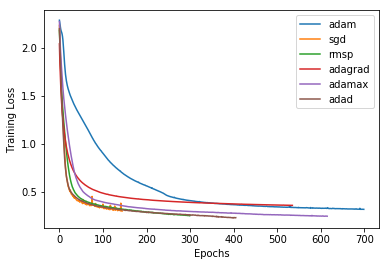

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(hist.history['loss'])
plt.plot(hist2.history['loss'])
plt.plot(hist3.history['loss'])
plt.plot(hist4.history['loss'])
plt.plot(hist5.history['loss'])
plt.plot(hist6.history['loss'])
plt.savefig('loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('loss with diff. optimizers.eps', format='eps', dpi=1000)
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])

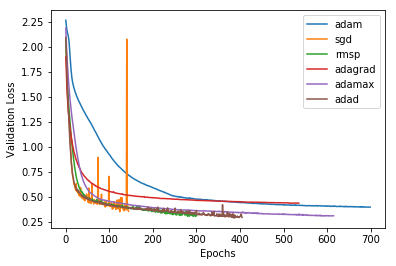

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
#plt.plot(hist1.history['loss'])
plt.plot(hist.history['val_loss'])
#plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
#plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
#plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
#plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
#plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('Validation loss with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('Validation loss with diff. optimizers.eps', format='eps', dpi=1000)

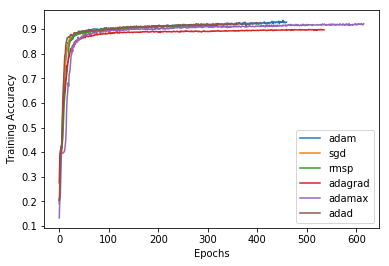

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.plot(hist1.history['acc'])
#plt.plot(hist1.history['val_loss'])
plt.plot(hist2.history['acc'])
#plt.plot(hist2.history['val_loss'])
plt.plot(hist3.history['acc'])
#plt.plot(hist3.history['val_loss'])
plt.plot(hist4.history['acc'])
#plt.plot(hist4.history['val_loss'])
plt.plot(hist5.history['acc'])
#plt.plot(hist5.history['val_loss'])
plt.plot(hist6.history['acc'])
#plt.plot(hist6.history['val_loss'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('training accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('training accuracy with diff. optimizers.eps', format='eps', dpi=1000)

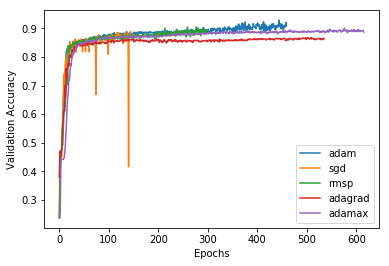

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(hist1.history['val_acc'])
plt.plot(hist2.history['val_acc'])
plt.plot(hist3.history['val_acc'])
plt.plot(hist4.history['val_acc'])
plt.plot(hist5.history['val_acc'])
plt.legend(['adam','sgd','rmsp','adagrad','adamax','adad'])
plt.savefig('validation accuracy with diff. optimizers.fig', format='eps', dpi=1000)
plt.savefig('validation accuracy with diff. optimizers.eps', format='eps', dpi=1000)